In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [4]:
h1n1=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [5]:
h1n1.describe

<bound method NDFrame.describe of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0              

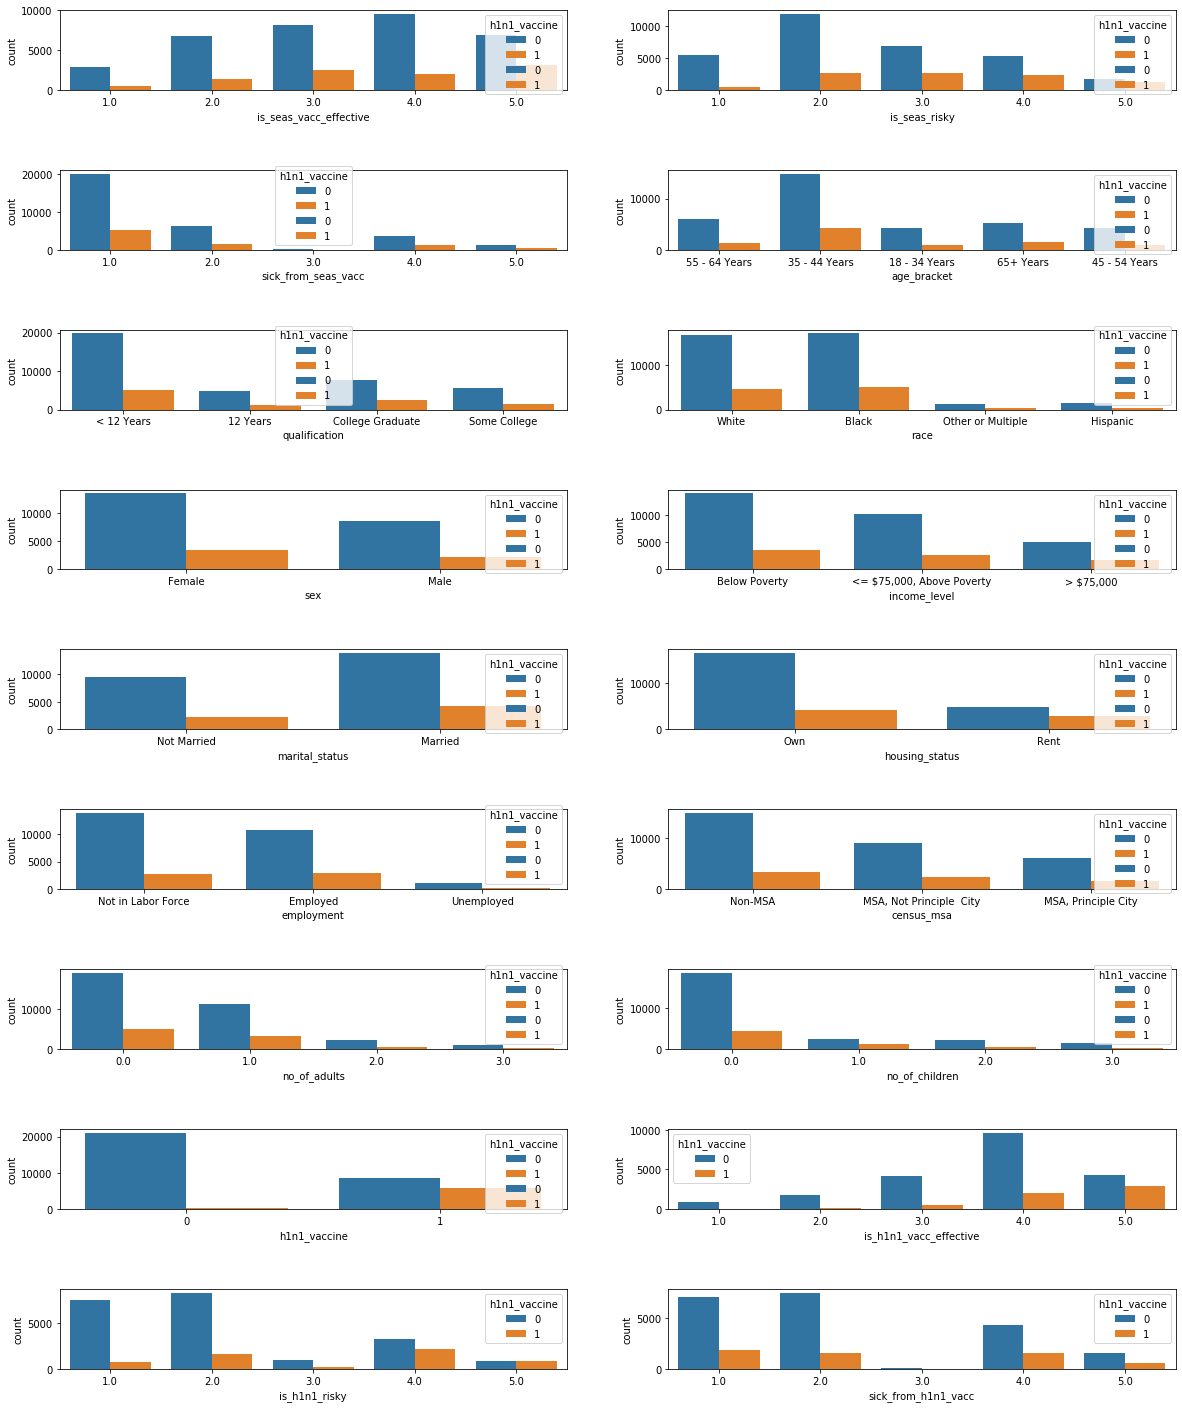

In [6]:
categorical_columns = ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc','chronic_medic_condition','cont_child_undr_6_mnths','is_health_worker','has_health_insur','is_h1n1_vacc_effective','is_h1n1_risky','sick_from_h1n1_vacc',]
categorical_columns1=['is_seas_vacc_effective','is_seas_risky','sick_from_seas_vacc','age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa','no_of_adults','no_of_children','h1n1_vaccine']
fig,axes = plt.subplots(9,2,figsize=(20,25))

for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=h1n1,hue='h1n1_vaccine',ax=axes[row,col])
plt.subplots_adjust(hspace=1)
for idx,cat_col in enumerate(categorical_columns1):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=h1n1,hue='h1n1_vaccine',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

KeyError: "['race'] not found in axis"

In [8]:
### Very few people less 12 years of age are vaccinated when compared to unvaccinated
### More females are unvaccinated when compared to men
### Most of the people with an own house are unvaccinated
### Very very few people are vaccinated in general

In [20]:
h1n1.reindex()

h1n1.drop("antiviral_medication",axis=1,inplace=True)

In [24]:
h1n1.isnull().sum()


unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
contact_avoidance                0
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment                    1463
census_msa          

In [14]:
h1n1["contact_avoidance"].fillna(h1n1["contact_avoidance"].mode()[0],inplace=True)


In [25]:
h1n1["h1n1_worry"].fillna(h1n1["h1n1_worry"].mode()[0],inplace=True)
h1n1["h1n1_awareness"].fillna(h1n1["h1n1_awareness"].mode()[0],inplace=True)
h1n1["bought_face_mask"].fillna(h1n1["bought_face_mask"].mode()[0],inplace=True)
h1n1["wash_hands_frequently"].fillna(h1n1["wash_hands_frequently"].mode()[0],inplace=True)
h1n1["avoid_large_gatherings"].fillna(h1n1["avoid_large_gatherings"].mode()[0],inplace=True)


In [27]:
h1n1["avoid_large_gatherings"].fillna(h1n1["avoid_large_gatherings"].mode()[0],inplace=True)
h1n1["reduced_outside_home_cont"].fillna(h1n1["reduced_outside_home_cont"].mode()[0],inplace=True)
h1n1["avoid_touch_face"].fillna(h1n1["avoid_touch_face"].mode()[0],inplace=True)
h1n1["dr_recc_h1n1_vacc"].fillna(h1n1["dr_recc_h1n1_vacc"].mode()[0],inplace=True)
h1n1["dr_recc_seasonal_vacc"].fillna(h1n1["dr_recc_seasonal_vacc"].mode()[0],inplace=True)
h1n1["chronic_medic_condition"].fillna(h1n1["chronic_medic_condition"].mode()[0],inplace=True)
h1n1["is_health_worker"].fillna(h1n1["is_health_worker"].mode()[0],inplace=True)
h1n1["has_health_insur"].fillna(h1n1["has_health_insur"].mode()[0],inplace=True)
h1n1["is_h1n1_vacc_effective"].fillna(h1n1["is_h1n1_vacc_effective"].mode()[0],inplace=True)
h1n1["is_h1n1_risky"].fillna(h1n1["is_h1n1_risky"].mode()[0],inplace=True)
h1n1["sick_from_h1n1_vacc"].fillna(h1n1["sick_from_h1n1_vacc"].mode()[0],inplace=True)


In [28]:
h1n1.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths       820
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa                      0
no_of_adults  

In [29]:
h1n1.drop("cont_child_undr_6_mnths",axis=1,inplace=True)

In [30]:
h1n1.drop("is_seas_vacc_effective",axis=1,inplace=True)
h1n1.drop("is_seas_risky",axis=1,inplace=True)

In [31]:
h1n1.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa                      0
no_of_adults                  249
no_of_children                249
h1n1_vaccine                    0
dtype: int64

In [32]:
h1n1.drop("sick_from_seas_vacc",axis=1,inplace=True)

In [33]:
h1n1.drop("marital_status",axis=1,inplace=True)
h1n1.drop("housing_status",axis=1,inplace=True)

In [34]:
h1n1.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
age_bracket                     0
qualification                1407
sex                             0
income_level                 4423
employment                   1463
census_msa                      0
no_of_adults                  249
no_of_children                249
h1n1_vaccine                    0
dtype: int64

In [35]:
h1n1["qualification"].fillna(h1n1["qualification"].mode()[0],inplace=True)
h1n1["income_level"].fillna(h1n1["income_level"].mode()[0],inplace=True)
h1n1["employment"].fillna(h1n1["employment"].mode()[0],inplace=True)
h1n1["no_of_adults"].fillna(h1n1["no_of_adults"].mode()[0],inplace=True)
h1n1["no_of_children"].fillna(h1n1["no_of_children"].mode()[0],inplace=True)


In [36]:
h1n1.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
age_bracket                  0
qualification                0
sex                          0
income_level                 0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [37]:
### Dataset is ready to work on

In [39]:
pd.set_option('max_columns', None)
h1n1.head(5)

,unique_id,h1n1_worry,h1n1_awareness,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,age_bracket,qualification,sex,income_level,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,55 - 64 Years,< 12 Years,Female,Below Poverty,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,35 - 44 Years,12 Years,Male,Below Poverty,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,18 - 34 Years,College Graduate,Male,"<= $75,000, Above Poverty",Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0,5.0,65+ Years,12 Years,Female,Below Poverty,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,45 - 54 Years,Some College,Female,"<= $75,000, Above Poverty",Employed,"MSA, Not Principle City",1.0,0.0,0


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
h1n1["sex"] = le.fit_transform(h1n1["sex"])
h1n1["age_bracket"] = le.fit_transform(h1n1["age_bracket"])
h1n1["qualification"] = le.fit_transform(h1n1["qualification"])
h1n1["employment"] = le.fit_transform(h1n1["employment"])

In [41]:
h1n1.head(5)

,unique_id,h1n1_worry,h1n1_awareness,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,age_bracket,qualification,sex,income_level,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,3,1,0,Below Poverty,1,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,1,0,1,Below Poverty,0,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,0,2,1,"<= $75,000, Above Poverty",0,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0,5.0,4,0,0,Below Poverty,1,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,2,3,0,"<= $75,000, Above Poverty",0,"MSA, Not Principle City",1.0,0.0,0


In [42]:
h1n1["income_level"] = le.fit_transform(h1n1["income_level"])
h1n1["census_msa"] = le.fit_transform(h1n1["census_msa"])

In [43]:
h1n1.tail(5)

,unique_id,h1n1_worry,h1n1_awareness,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,age_bracket,qualification,sex,income_level,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,4,3,0,0,1,2,0.0,0.0,0
26703,26703,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,4.0,2.0,2.0,0,2,1,0,0,1,1.0,0.0,0
26704,26704,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0,3,3,0,0,0,0,0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0,3,0,0,0,2,1.0,0.0,0
26706,26706,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,4,3,1,0,1,1,1.0,0.0,0


In [44]:
X = h1n1.drop(["h1n1_vaccine"],axis=1)
y = h1n1["h1n1_vaccine"]

In [49]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier 
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import model_selection

from sklearn.svm import SVC
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

In [51]:
### Checking the importance of all features with respect to h1n1_vaccine

In [52]:
print("Feature importance by Random Forest:->\n")
RF = RandomForestClassifier()
RF.fit(X,y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)

Feature importance by Random Forest:->

unique_id -> 0.1509679467470535
h1n1_worry -> 0.04089719772868173
h1n1_awareness -> 0.02974792919458231
contact_avoidance -> 0.019698444216256838
bought_face_mask -> 0.011429814663341581
wash_hands_frequently -> 0.012430847558880711
avoid_large_gatherings -> 0.020477037626972342
reduced_outside_home_cont -> 0.02058238044976213
avoid_touch_face -> 0.01970651116759007
dr_recc_h1n1_vacc -> 0.11015714277658831
dr_recc_seasonal_vacc -> 0.02464510899851303
chronic_medic_condition -> 0.019622029463321224
is_health_worker -> 0.022417059773716802
has_health_insur -> 0.007379241138784433
is_h1n1_vacc_effective -> 0.07273546133750472
is_h1n1_risky -> 0.08548941804690312
sick_from_h1n1_vacc -> 0.0455654259045997
age_bracket -> 0.05226941095927581
qualification -> 0.042136360958553484
sex -> 0.023703087776269293
income_level -> 0.029306404231191494
employment -> 0.027125740837813096
census_msa -> 0.04059005069876496
no_of_adults -> 0.039970761641358134
no_of_

In [53]:
print("Feature importance by Decision Tree:->\n")
DT = DecisionTreeClassifier()
DT.fit(X,y)
features = DT.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)

Feature importance by Decision Tree:->

unique_id -> 0.22463332135079855
h1n1_worry -> 0.042949528078819126
h1n1_awareness -> 0.03004163751014579
contact_avoidance -> 0.016091469488796
bought_face_mask -> 0.009956079404523928
wash_hands_frequently -> 0.01224552517112898
avoid_large_gatherings -> 0.01880106534037418
reduced_outside_home_cont -> 0.013890822018875868
avoid_touch_face -> 0.01680414452379191
dr_recc_h1n1_vacc -> 0.1553035441862098
dr_recc_seasonal_vacc -> 0.01420205164893346
chronic_medic_condition -> 0.016489366766033325
is_health_worker -> 0.019282177826463534
has_health_insur -> 0.007182060938317325
is_h1n1_vacc_effective -> 0.05587097210535363
is_h1n1_risky -> 0.05851466633493521
sick_from_h1n1_vacc -> 0.03997081078964303
age_bracket -> 0.04183675937355902
qualification -> 0.0357375801531303
sex -> 0.017027132613688104
income_level -> 0.026856846001139453
employment -> 0.025947812649939714
census_msa -> 0.03433101923974384
no_of_adults -> 0.03920271729570751
no_of_child

In [54]:
print("Feature importance by Support Vector Machine:->\n")
SVM = SVC(kernel="linear")
SVM.fit(X,y)
features = SVM.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)

Feature importance by Suppoprt Vector Machine:->

unique_id -> -0.09666866064071655
h1n1_worry -> -6.075967507762925
h1n1_awareness -> 130.08912385675285
contact_avoidance -> -8.914491491382705
bought_face_mask -> 41.0
wash_hands_frequently -> 39.64987843914014
avoid_large_gatherings -> -84.59327792740396
reduced_outside_home_cont -> -61.59327792740396
avoid_touch_face -> 12.529691641795125
dr_recc_h1n1_vacc -> 607.5944973903667
dr_recc_seasonal_vacc -> 188.21805786574873
chronic_medic_condition -> 80.68733949972147
is_health_worker -> 246.4583662060631
has_health_insur -> 36.00000000016871
is_h1n1_vacc_effective -> 442.2440374451435
is_h1n1_risky -> 369.02070498676767
sick_from_h1n1_vacc -> 16.739685050826665
age_bracket -> 62.17842630498944
qualification -> 45.11501391969432
sex -> 49.81695658163051
income_level -> 1.0770918705156873
employment -> -11.23224093846602
census_msa -> 33.920385078271465
no_of_adults -> 9.350856810378673
no_of_children -> -6.304013966709704


In [55]:
print("Feature importance by Logistic Regression:->\n")
LOGC = LogisticRegression()
LOGC.fit(X,y)
features = LOGC.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)

Feature importance by Logistic Regression:->

unique_id -> -2.4890141840004193e-05
h1n1_worry -> -0.12385489454211235
h1n1_awareness -> -0.00869024224681341
contact_avoidance -> -0.19997279740659413
bought_face_mask -> 0.09986728045797491
wash_hands_frequently -> -0.24896656695894306
avoid_large_gatherings -> -0.13552351553724926
reduced_outside_home_cont -> -0.10501233607897703
avoid_touch_face -> -0.09441079347983256
dr_recc_h1n1_vacc -> 1.2813547663804374
dr_recc_seasonal_vacc -> 0.5566588867663746
chronic_medic_condition -> 0.14132513238698013
is_health_worker -> 0.40835269700791804
has_health_insur -> -0.49380466100288395
is_h1n1_vacc_effective -> 0.20030858768647125
is_h1n1_risky -> 0.4400291067277157
sick_from_h1n1_vacc -> -0.18274652612234615
age_bracket -> -0.14895241490366234
qualification -> -0.013534752376506722
sex -> -0.25775770221089006
income_level -> -0.12077171554728247
employment -> -0.27167899828243586
census_msa -> -0.2243835577517422
no_of_adults -> -0.25381737141

C:\Users\amitj\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [58]:
from sklearn.preprocessing import StandardScaler
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

In [59]:
SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4739
           1       0.67      0.50      0.57      1938

    accuracy                           0.78      6677
   macro avg       0.74      0.70      0.72      6677
weighted avg       0.77      0.78      0.77      6677

SVM:> 0.7844840497229295


In [60]:
Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.85      0.90      5793
           1       0.41      0.67      0.51       884

    accuracy                           0.83      6677
   macro avg       0.68      0.76      0.70      6677
weighted avg       0.87      0.83      0.85      6677

RandomForestClassifier:> 0.8291148719484799


In [61]:
Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.85      0.90      5755
           1       0.42      0.66      0.52       922

    accuracy                           0.83      6677
   macro avg       0.68      0.76      0.71      6677
weighted avg       0.87      0.83      0.84      6677

GradientBoostingClassifier:> 0.8282162647895761


In [62]:
Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      5289
           1       0.51      0.53      0.52      1388

    accuracy                           0.79      6677
   macro avg       0.69      0.70      0.69      6677
weighted avg       0.80      0.79      0.80      6677

DecisionTreeClassifier:> 0.7946682641905047


C:\Users\amitj\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\amitj\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [63]:
Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5818
           1       0.39      0.66      0.49       859

    accuracy                           0.82      6677
   macro avg       0.67      0.75      0.69      6677
weighted avg       0.87      0.82      0.84      6677

AdaBoostClassifier:> 0.8241725325745095


In [65]:
Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      5657
           1       0.45      0.63      0.52      1020

    accuracy                           0.82      6677
   macro avg       0.69      0.74      0.71      6677
weighted avg       0.85      0.82      0.84      6677

LinearDiscriminantAnalysis:> 0.8234236932754231


In [66]:
KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5979
           1       0.31      0.64      0.42       698

    accuracy                           0.81      6677
   macro avg       0.63      0.74      0.65      6677
weighted avg       0.89      0.81      0.84      6677

KNeighborsClassifier:> 0.8132394788078479


In [67]:
Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      5826
           1       0.40      0.67      0.50       851

    accuracy                           0.83      6677
   macro avg       0.67      0.76      0.70      6677
weighted avg       0.88      0.83      0.84      6677

Logistic Regression:> 0.8271678897708552


In [68]:
### Out of all classifiers we can see all classifying techniques give an accuracy close to 0.82 with Decision Tree Classifier 
### being the lowest at 0.79